In [1]:
import os
import re
from typing import Dict
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
from harmonypy import run_harmony
import matplotlib.pyplot as plt

import integration as it
import tmpPypkg.globalvar as gv
from tmpPypkg.singlecell import normalize_data
from tmpPypkg.plot import categorical_scatter

In [2]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [45]:
# input data can be anndata or xr.array
def draw_single_group_umap(
    d, 
    ax,
    hue = None,
    pal = "auto",
    base = "umap",
    nmax = 100000,
    title = "UMAP",
    color = "lightcoral",
    rasterized = True,
    labelsize = 10,
    titlesize = 25
) -> None: 
    categorical_scatter(
        data = d,
        hue = hue,
        palette = pal,
        coord_base = base,
        max_points = nmax,
        color = color,
        return_fig = False,
        rasterized = rasterized,
        ax = ax,
        labelsize = labelsize
    )
    ax.set_title(title, fontsize=titlesize)
    return None

In [46]:
def show_coembed(coord: str = "umap") -> None:
    fig, ax = plt.subplots(
        nrows=1, ncols=1, dpi=200, figsize=(14, 14), constrained_layout=True
    )
    categorical_scatter(
        data=ann_intgrn,
        coord_base=coord,
        max_points=None,
        hue="batch",
        palette="auto",
        show_legend=True,
        scatter_kws=dict(color="lightgrey", legend="full"),
        ax=ax,
    )
    return None

In [4]:
coembed_class = "neu"
anchord = os.path.join(gv.pt_projd, "03.integration", "out")
annd = os.path.join(gv.pt_projd, "data")
ntop = 7500
npca = 50
# prefix = "int"
prefix = "all"
# suffix = "ds"
suffix = "all"

In [8]:
ann_intgrn = ad.read_h5ad(
    os.path.join(anchord, "coembed", f"{prefix}.intgrn.hvg.ann.umap.h5ad"))

In [10]:
ann_intgrn

AnnData object with n_obs × n_vars = 2493990 × 50
    obs: 'barcode', 'batch', 'leiden'
    uns: 'leiden', 'leiden_sizes', 'neighbors', 'paga'
    obsm: 'X_harmony', 'X_umap', 'X_umap_hm', 'raw_pca'
    obsp: 'connectivities', 'distances'

In [39]:
ann_intgrn.obs.batch.value_counts()
ann_intgrn.obs.batch.unique()

batch
PariedTag     1802702
Allen10Xv3     353422
snATAC         279098
snmC            58768
Name: count, dtype: int64

['Allen10Xv3', 'PariedTag', 'snmC', 'snATAC']
Categories (4, object): ['Allen10Xv3', 'PariedTag', 'snATAC', 'snmC']

/projects/ps-renlab2/szu/projects/amb_pairedtag/tmpPypkg/plot/categorical_scatter.py:228: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/projects/ps-renlab2/szu/projects/amb_pairedtag/tmpPypkg/plot/categorical_scatter.py:228: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/projects/ps-renlab2/szu/projects/amb_pairedtag/tmpPypkg/plot/categorical_scatter.py:228: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/projects/ps-renlab2/szu/projects/amb_pairedtag/tmpPypkg/plot/categorical_scatter.py:228: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


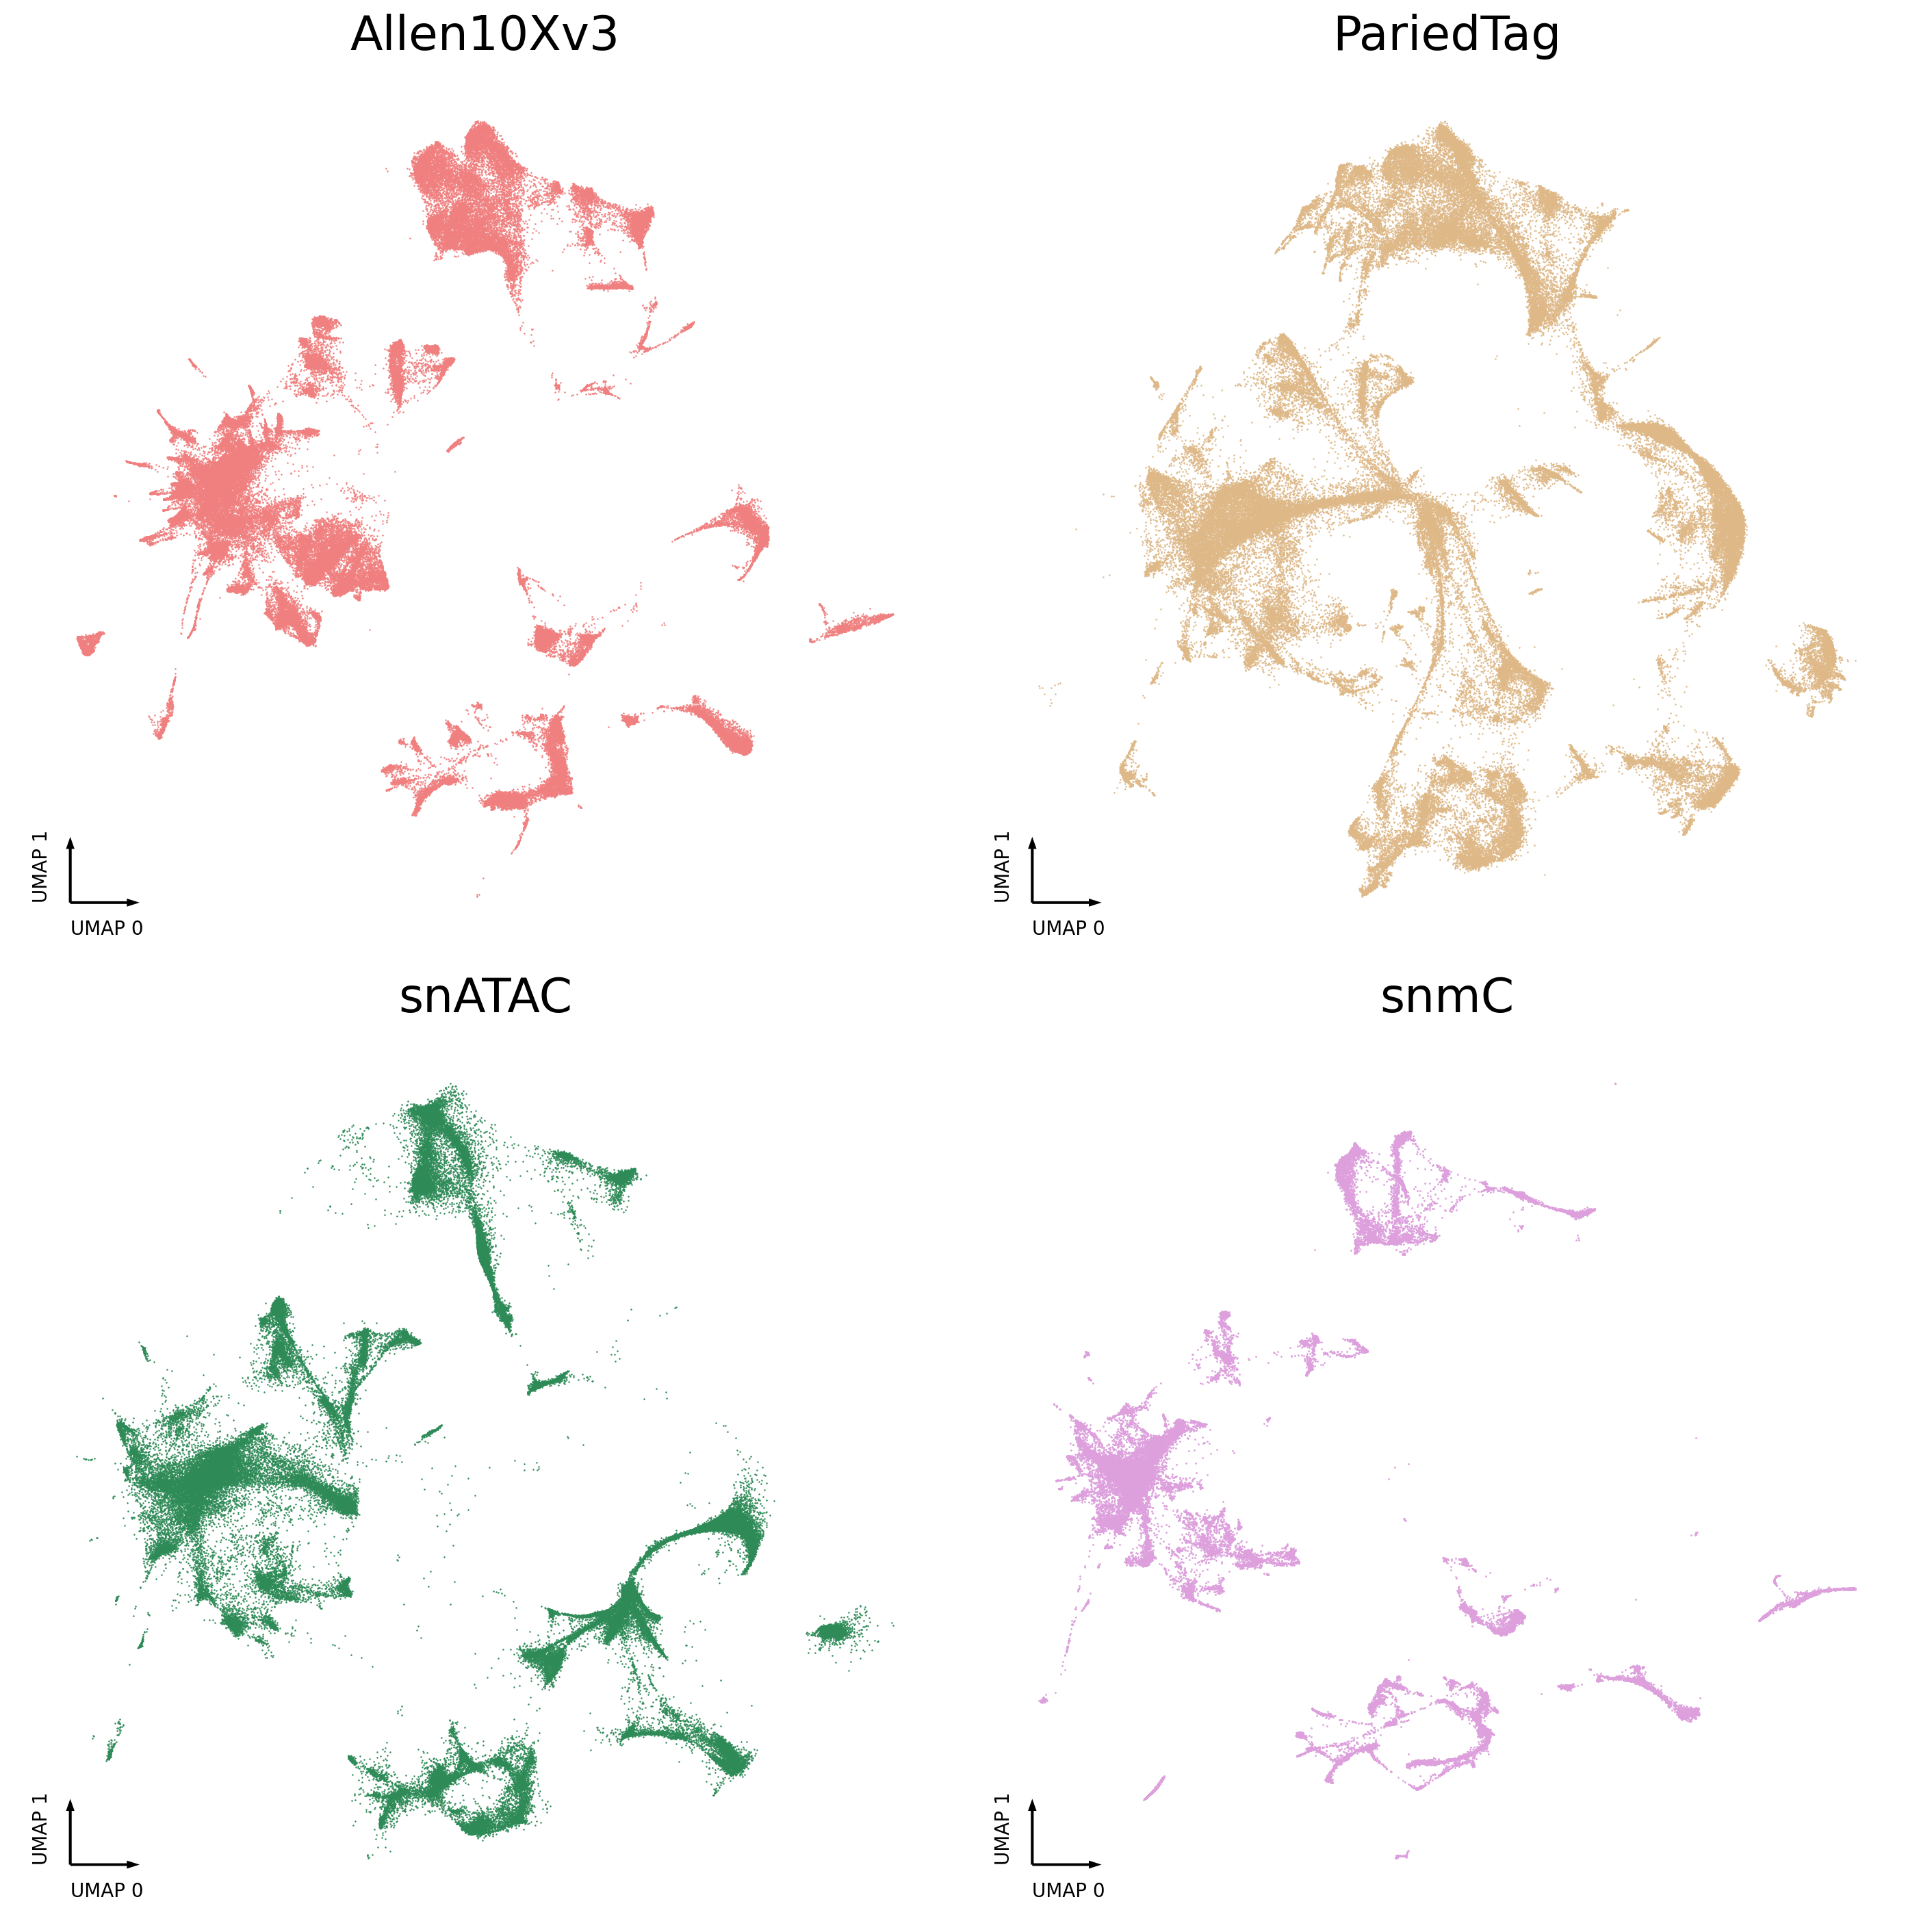

In [51]:
fig, axes = plt.subplots(
        nrows=2, ncols=2, dpi=200, figsize=(14, 14), constrained_layout=True)
colors = ["lightcoral", "burlywood", "seagreen", "plum"]
for i, nm in enumerate(['Allen10Xv3', 'PariedTag', 'snATAC', 'snmC']):
    draw_single_group_umap(d = ann_intgrn[ann_intgrn.obs.batch == nm], 
                      ax = axes[i // 2, i % 2],
                      color = colors[i],
                      title = nm)

Text(0.5, 1.0, 'UMAP of All the Modalities')

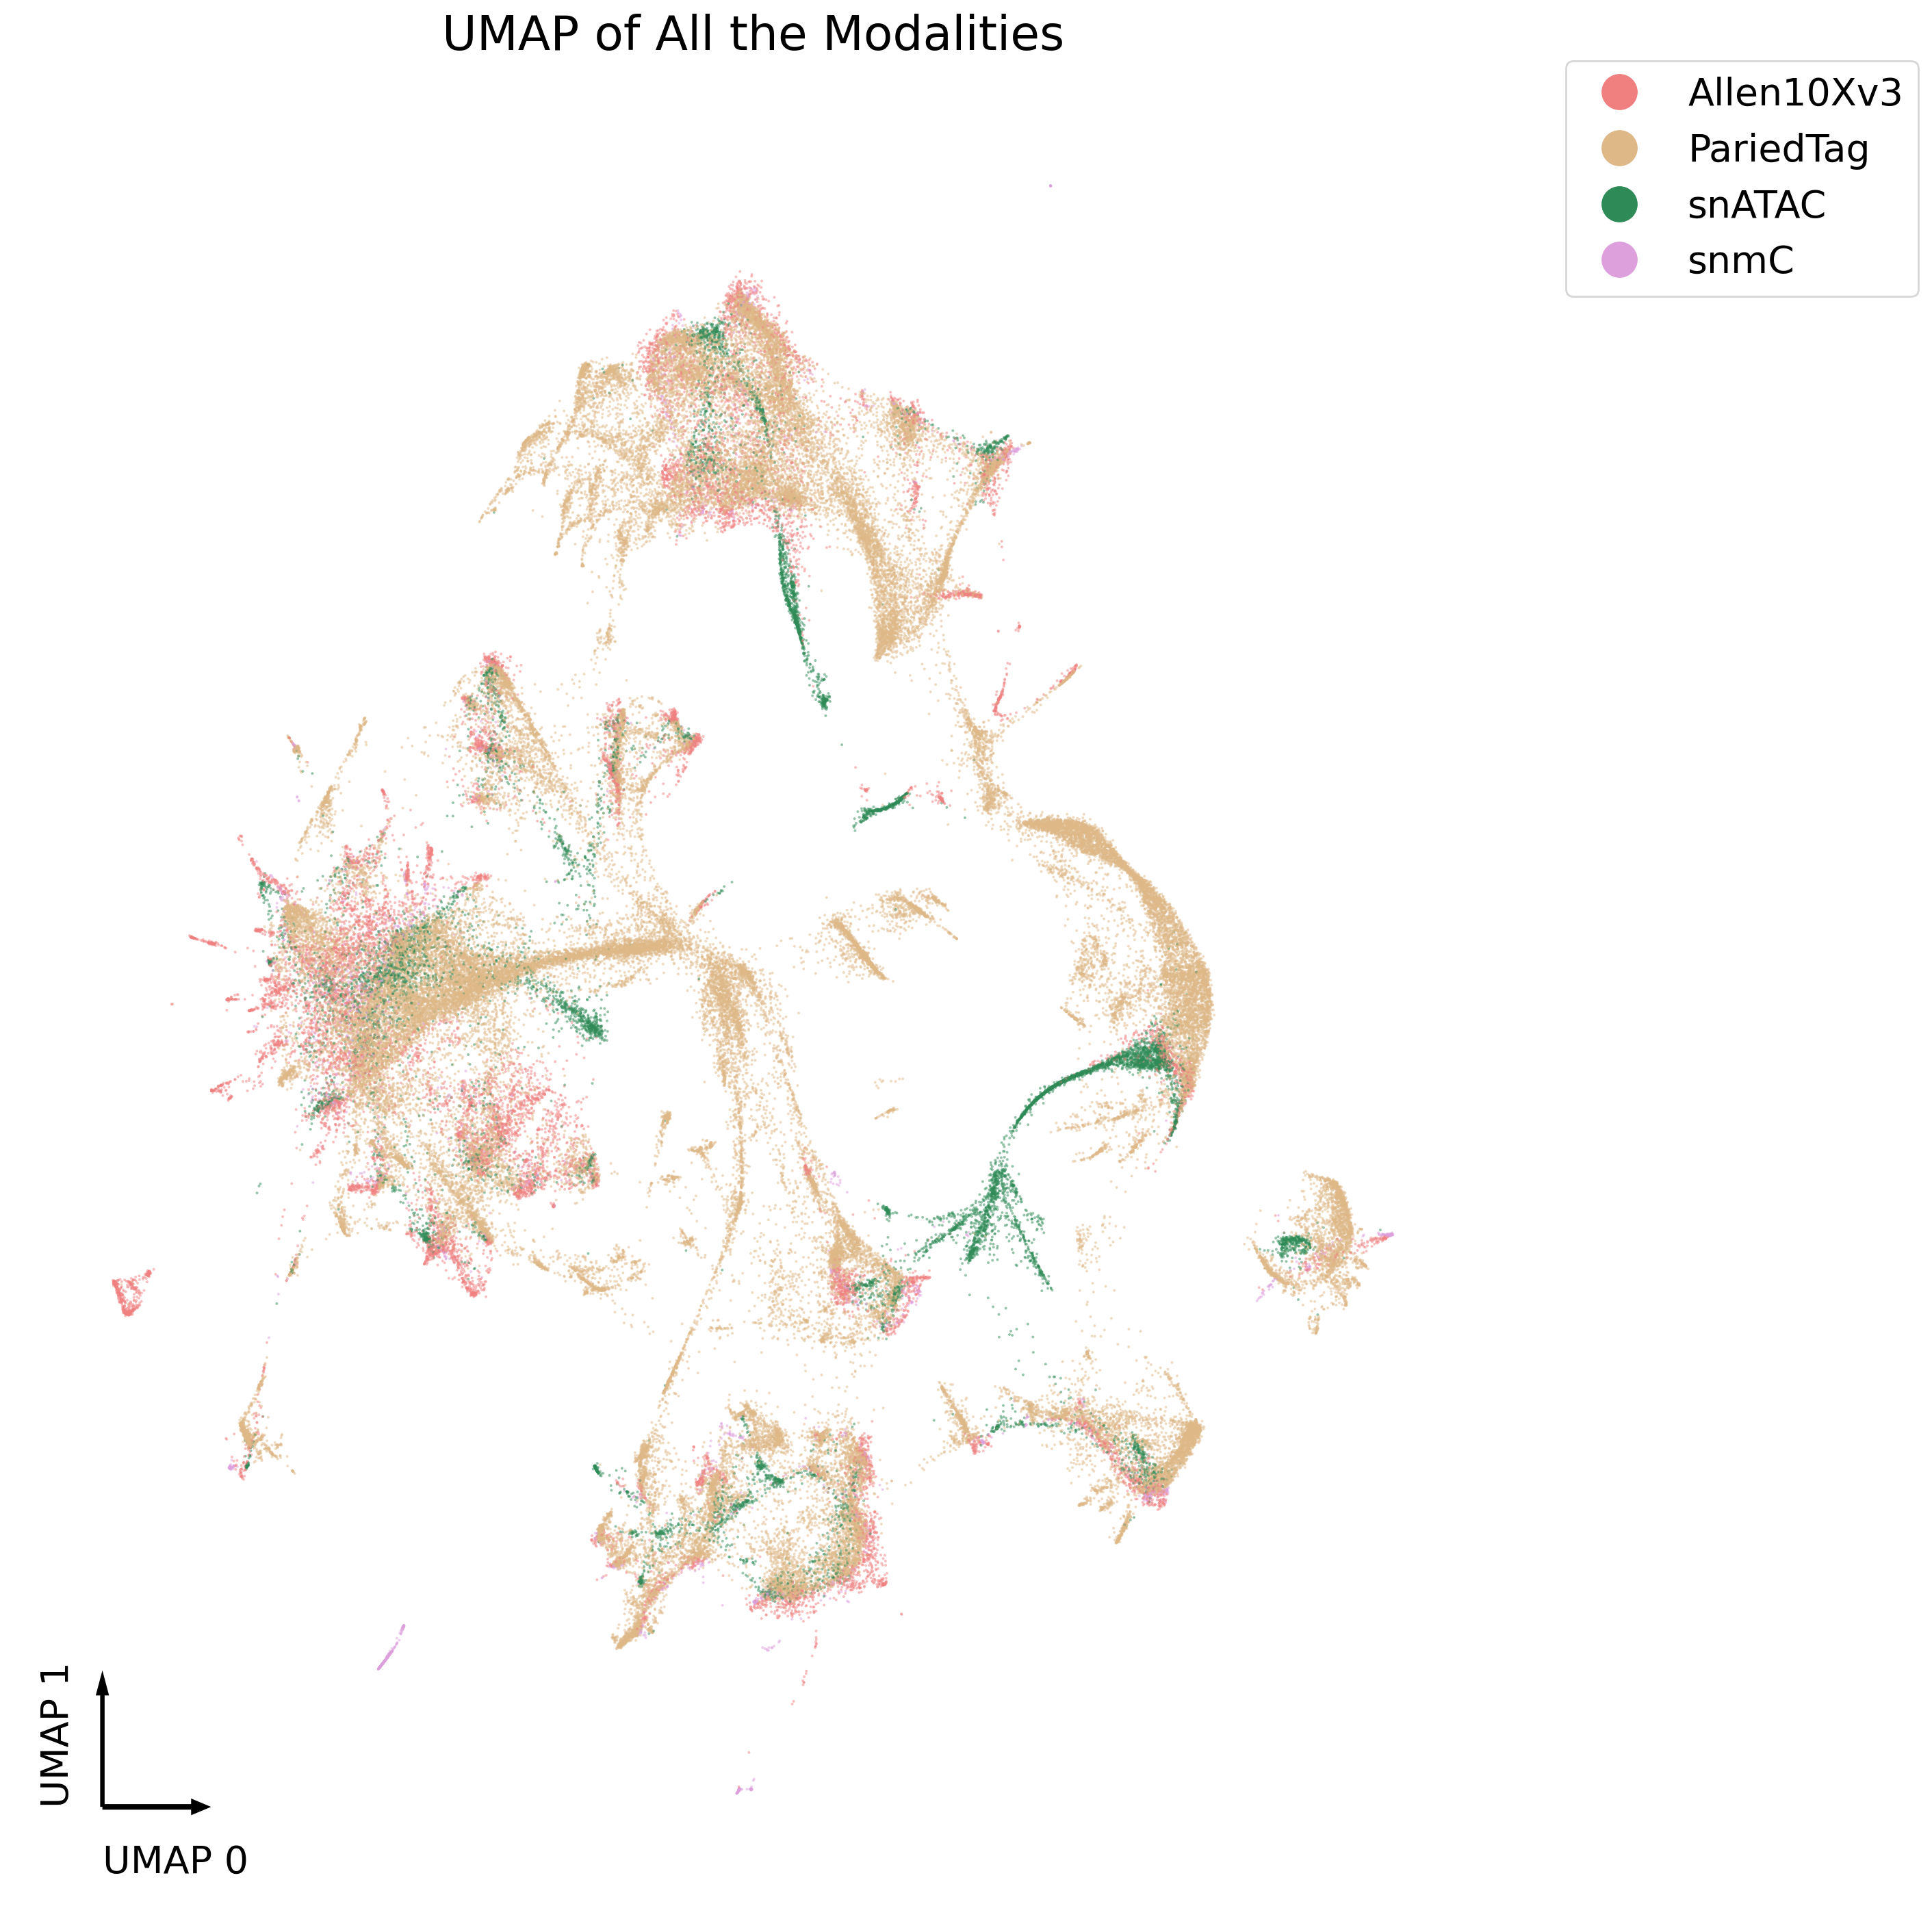

In [57]:
fig, ax = plt.subplots(
        nrows=1, ncols=1, dpi=200, figsize=(14, 14), constrained_layout=True
    )
categorical_scatter(
        data=ann_intgrn,
        coord_base="umap",
        max_points=100000,
        hue="batch",
        palette=colors,
        show_legend=True,
        scatter_kws=dict(color="lightgrey", legend="full", alpha = 0.5),
        ax=ax,
    labelsize = 20,
    )
ax.set_title("UMAP of All the Modalities", fontsize = 25)

Text(0.5, 1.0, 'UMAP of All the Modalities After Harmony')

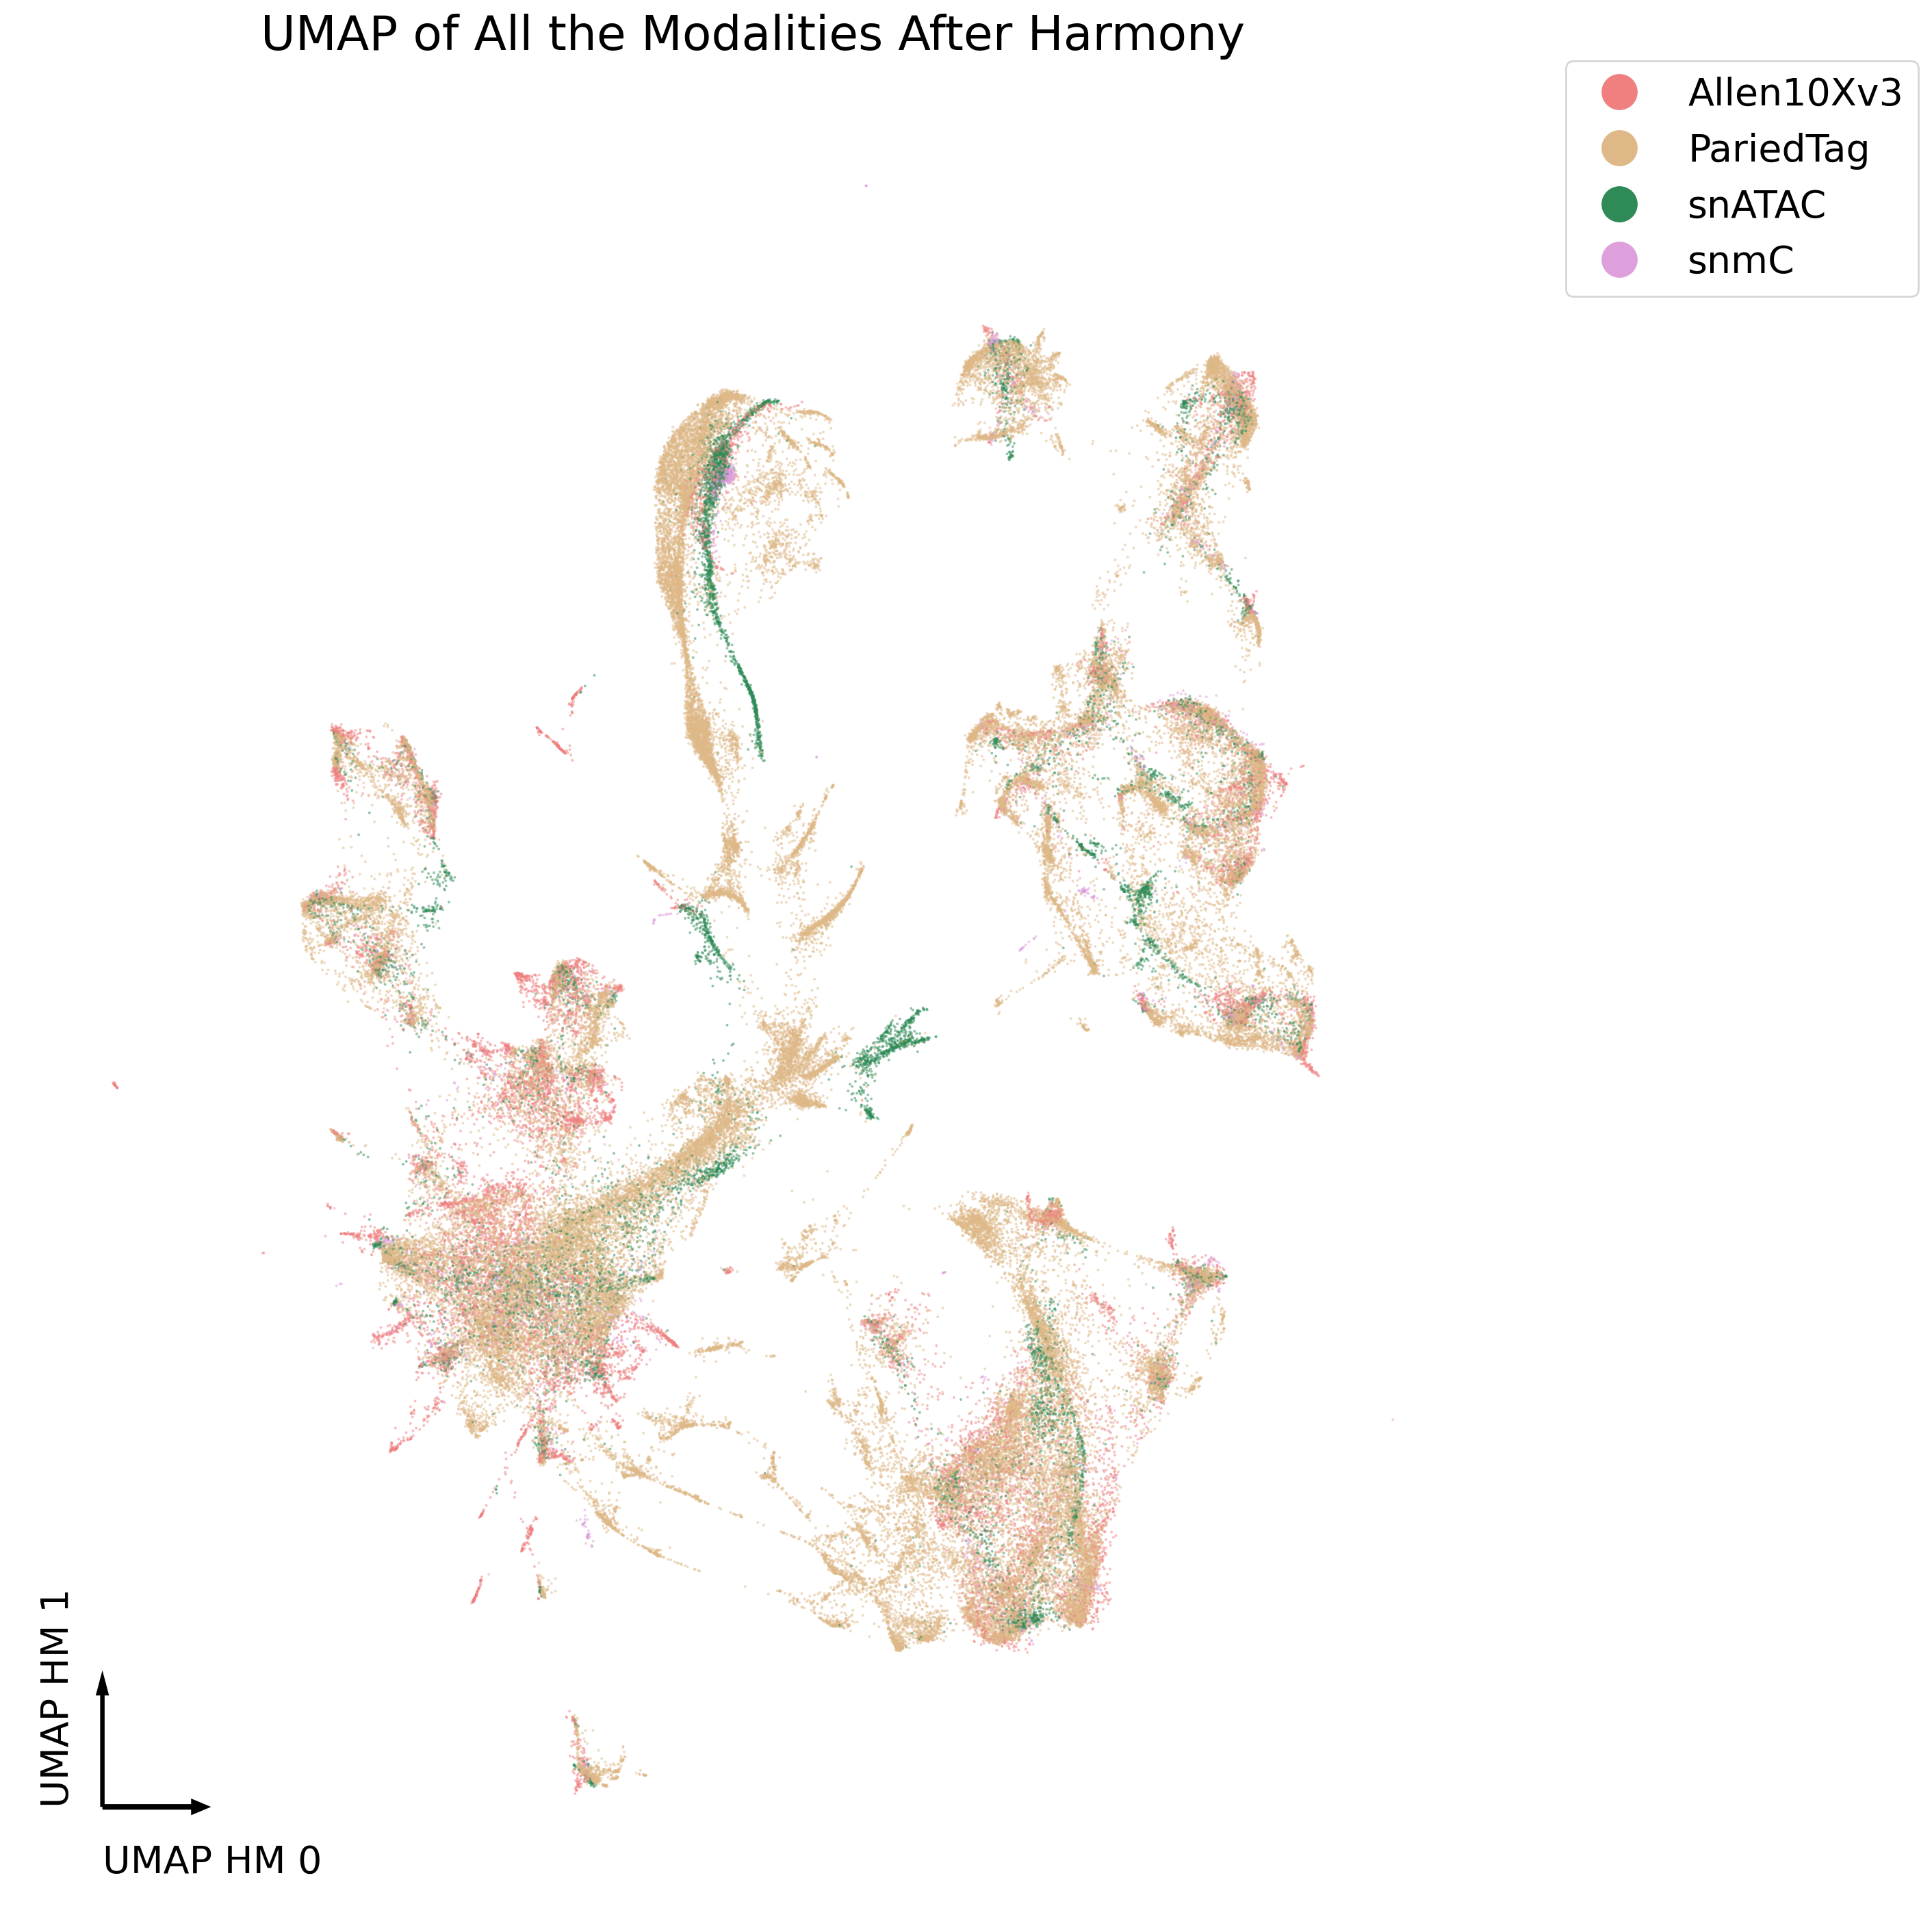

In [55]:
fig, ax = plt.subplots(
        nrows=1, ncols=1, dpi=200, figsize=(14, 14), constrained_layout=True
    )
categorical_scatter(
        data=ann_intgrn,
        coord_base="umap_hm",
        max_points=100000,
        hue="batch",
        palette=colors,
        show_legend=True,
        scatter_kws=dict(color="lightgrey", legend="full", alpha = 0.5),
        ax=ax,
    labelsize = 20,
    )
ax.set_title("UMAP of All the Modalities After Harmony", fontsize = 25)

/projects/ps-renlab2/szu/projects/amb_pairedtag/tmpPypkg/plot/categorical_scatter.py:228: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/projects/ps-renlab2/szu/projects/amb_pairedtag/tmpPypkg/plot/categorical_scatter.py:228: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/projects/ps-renlab2/szu/projects/amb_pairedtag/tmpPypkg/plot/categorical_scatter.py:228: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/projects/ps-renlab2/szu/projects/amb_pairedtag/tmpPypkg/plot/categorical_scatter.py:228: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


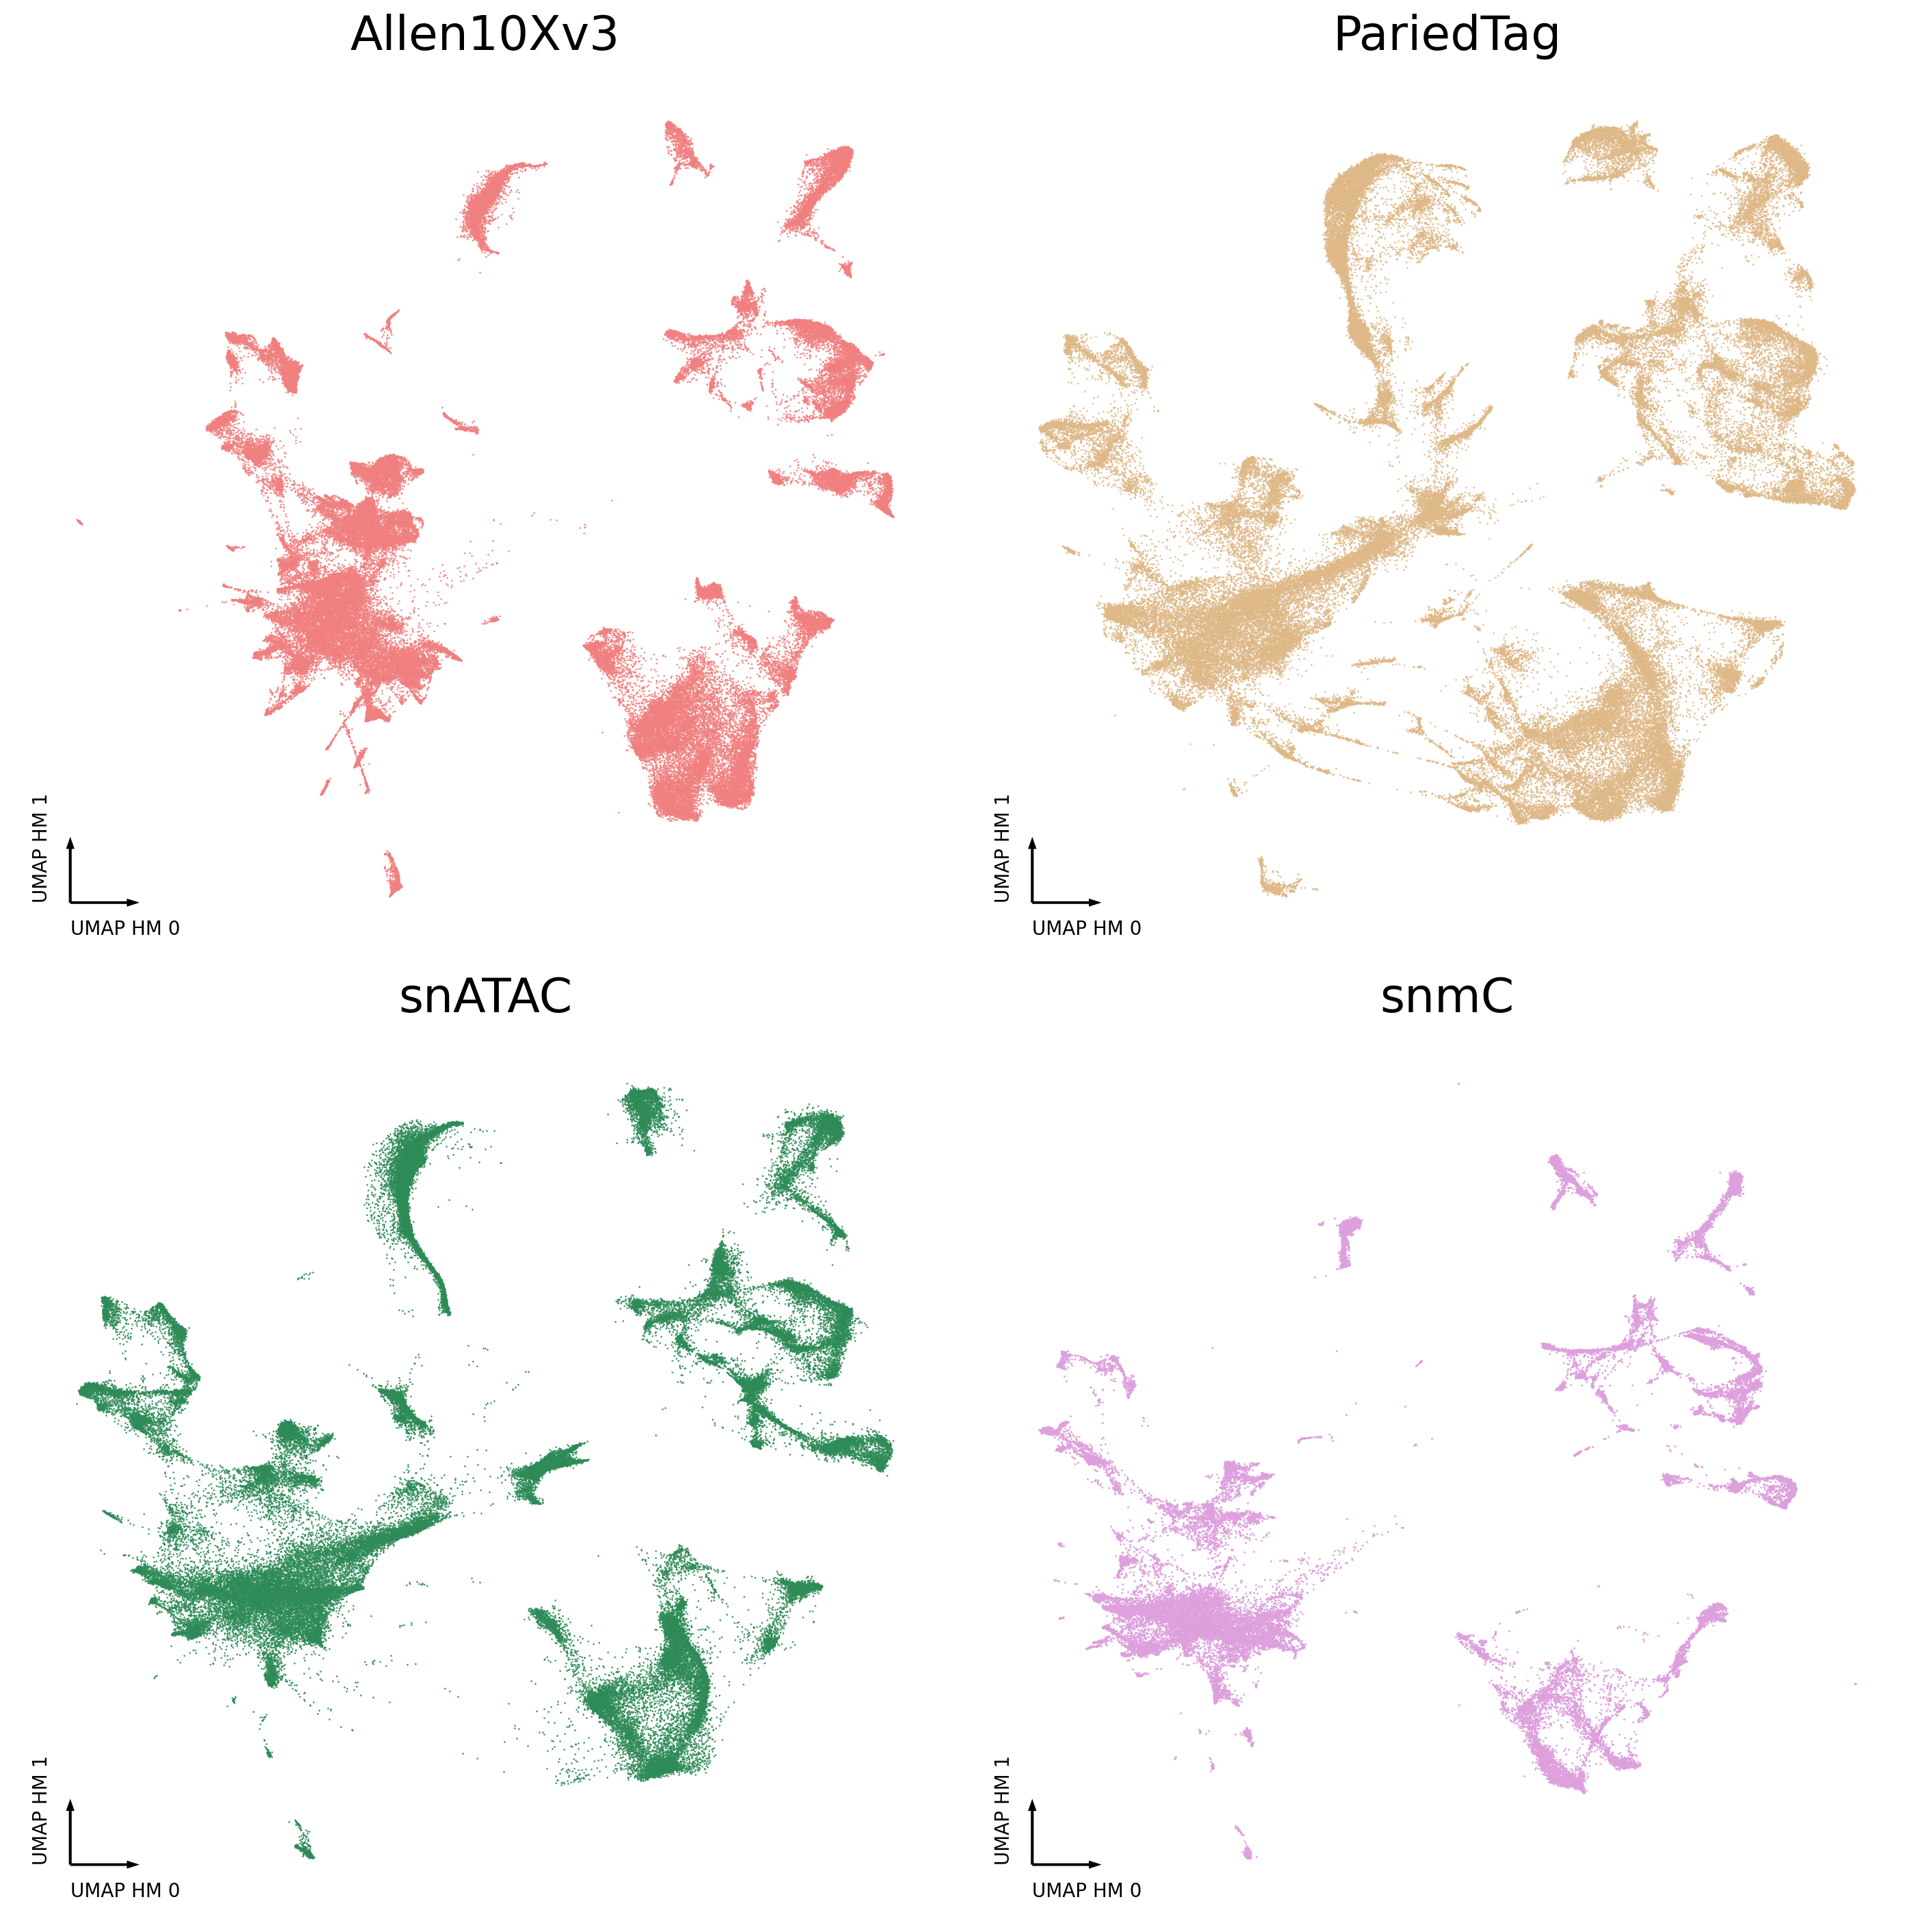

In [56]:
fig, axes = plt.subplots(
        nrows=2, ncols=2, dpi=200, figsize=(14, 14), constrained_layout=True)
colors = ["lightcoral", "burlywood", "seagreen", "plum"]
for i, nm in enumerate(['Allen10Xv3', 'PariedTag', 'snATAC', 'snmC']):
    draw_single_group_umap(d = ann_intgrn[ann_intgrn.obs.batch == nm], 
                      ax = axes[i // 2, i % 2],
                      base = "umap_hm",
                      color = colors[i],
                      title = nm)